In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
#read csv file
pokemon=pd.read_csv("Pokemon.csv")


In [27]:
pokemon.head(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [28]:
pokemon.isnull().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [8]:
pokemon["Type 2"].fillna(pokemon["Type 1"],inplace=True)

In [9]:
pokemon.isnull().sum()

Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

## To find the attacking power of pokemon distributed across all generations

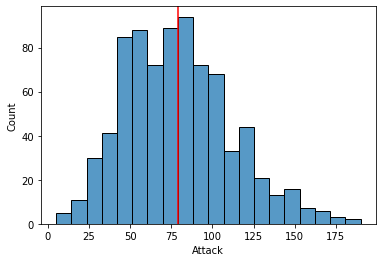

In [31]:
# for distribution we can use histogram
## it is plot between count and given attribute
# histogram is used to see whether the data is skewed or not
sns.histplot(pokemon['Attack'])
# average power attack of dataset
plt.axvline(pokemon["Attack"].mean(),color='red')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Attack', ylabel='Density'>

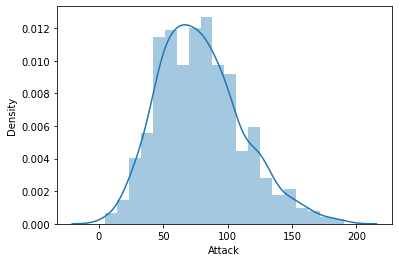

In [32]:
# distplot
# it is plot between density and given attribute
sns.distplot(pokemon['Attack'])

## Find Correlation between attributes

In [35]:
pokemon.corr()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


## Heatmap for correlation

<AxesSubplot:>

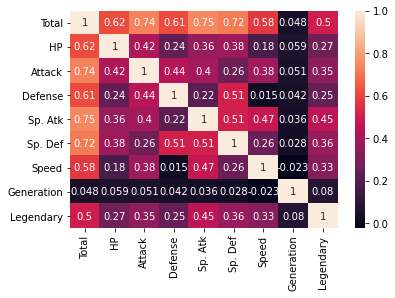

In [36]:
sns.heatmap(pokemon.corr(),annot=True)

## Fire V/S Water Pokemon attacking and defense power

In [42]:
# first we need to separate data for fire and water pokemon
fire=pokemon[(pokemon['Type 1']=="Fire") | (pokemon['Type 2']=='Fire')]
#fire.sample(5)
water=pokemon[(pokemon['Type 1']=="Water") | (pokemon['Type 2']=='Water')]

In [44]:
#fire shape
fire.shape

(64, 12)

In [43]:
#water shape
water.shape

(126, 12)

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

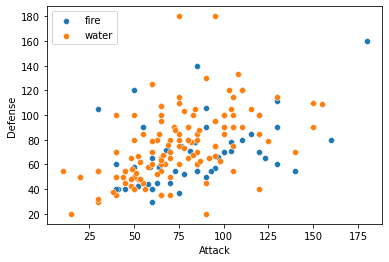

In [46]:
# plot scatter plot
#scatter plot gives good visualisation for continuous variables
sns.scatterplot(x='Attack',y='Defense',data=fire,label='fire')
sns.scatterplot(x='Attack',y='Defense',data=water,label='water')

## Regression plot for the same 

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

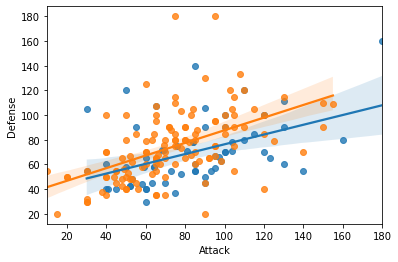

In [48]:
sns.regplot(x='Attack',y='Defense',data=fire,label='fire')
sns.regplot(x='Attack',y='Defense',data=water,label='water')

## Swarmplot -Generation V/S Speed

<AxesSubplot:xlabel='Generation', ylabel='Speed'>

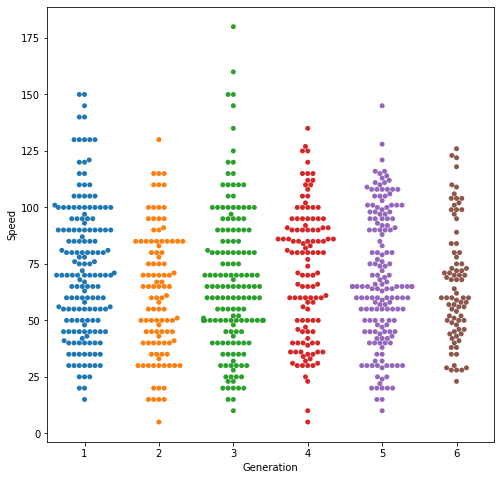

In [53]:
# plotting swarm plot
plt.figure(figsize=(8,8))
sns.swarmplot(x='Generation',y='Speed',data=pokemon)


## Do Pokemon is Legendary or not affects its total strength?

[Text(0, 0, 'False'), Text(1, 0, 'True')]

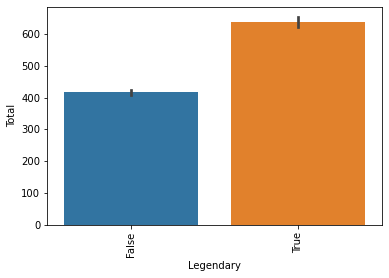

In [55]:
# Bar plot
a=sns.barplot(x='Legendary',y='Total',data=pokemon)
a.set_xticklabels(a.get_xticklabels(),rotation=90)

## Line Graph

## Number of Pokemons by each type and generation

In [58]:
#transforming dataset
a=pokemon.groupby(['Generation','Type 1']).count().reset_index()
a

,Generation,Type 1,Name,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bug,14,11,14,14,14,14,14,14,14,14
1,1,Dragon,3,1,3,3,3,3,3,3,3,3
2,1,Electric,9,3,9,9,9,9,9,9,9,9
3,1,Fairy,2,0,2,2,2,2,2,2,2,2
4,1,Fighting,7,0,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...
93,6,Poison,2,2,2,2,2,2,2,2,2,2
94,6,Psychic,5,2,5,5,5,5,5,5,5,5
95,6,Rock,9,9,9,9,9,9,9,9,9,9
96,6,Steel,5,5,5,5,5,5,5,5,5,5


In [60]:
a=a[["Generation","Type 1","Total"]]
a

,Generation,Type 1,Total
0,1,Bug,14
1,1,Dragon,3
2,1,Electric,9
3,1,Fairy,2
4,1,Fighting,7
...,...,...,...
93,6,Poison,2
94,6,Psychic,5
95,6,Rock,9
96,6,Steel,5


In [61]:
a=a.pivot("Generation","Type 1","Total")
a

Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Generation,,,,,,,,,,,,,,,,,,
1,14.0,NaN,3.0,9.0,2.0,7.0,14.0,NaN,4.0,13.0,8.0,2.0,24.0,14.0,11.0,10.0,NaN,31.0
2,12.0,6.0,NaN,7.0,5.0,2.0,8.0,NaN,1.0,9.0,3.0,4.0,15.0,1.0,7.0,5.0,3.0,18.0
3,12.0,6.0,12.0,5.0,NaN,5.0,8.0,NaN,5.0,13.0,7.0,7.0,18.0,3.0,12.0,8.0,12.0,27.0
4,10.0,3.0,4.0,12.0,1.0,3.0,5.0,NaN,7.0,15.0,4.0,3.0,18.0,6.0,8.0,6.0,3.0,13.0
5,18.0,13.0,9.0,8.0,NaN,7.0,9.0,2.0,5.0,15.0,10.0,6.0,19.0,2.0,14.0,6.0,4.0,18.0
6,3.0,3.0,4.0,3.0,9.0,3.0,8.0,2.0,10.0,5.0,NaN,2.0,4.0,2.0,5.0,9.0,5.0,5.0


<AxesSubplot:xlabel='Generation'>

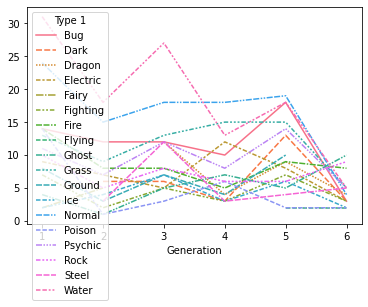

In [62]:
# plotting lineplot
sns.lineplot(data=a)

## Outliers-Boxplot

<AxesSubplot:xlabel='Total'>

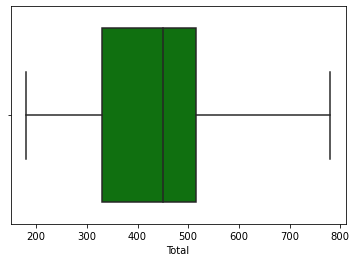

In [65]:
#boxplot
sns.boxplot(x=pokemon["Total"],color="green")

<AxesSubplot:xlabel='Speed'>

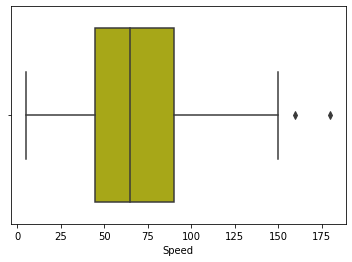

In [66]:
sns.boxplot(x=pokemon["Speed"],color="y")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


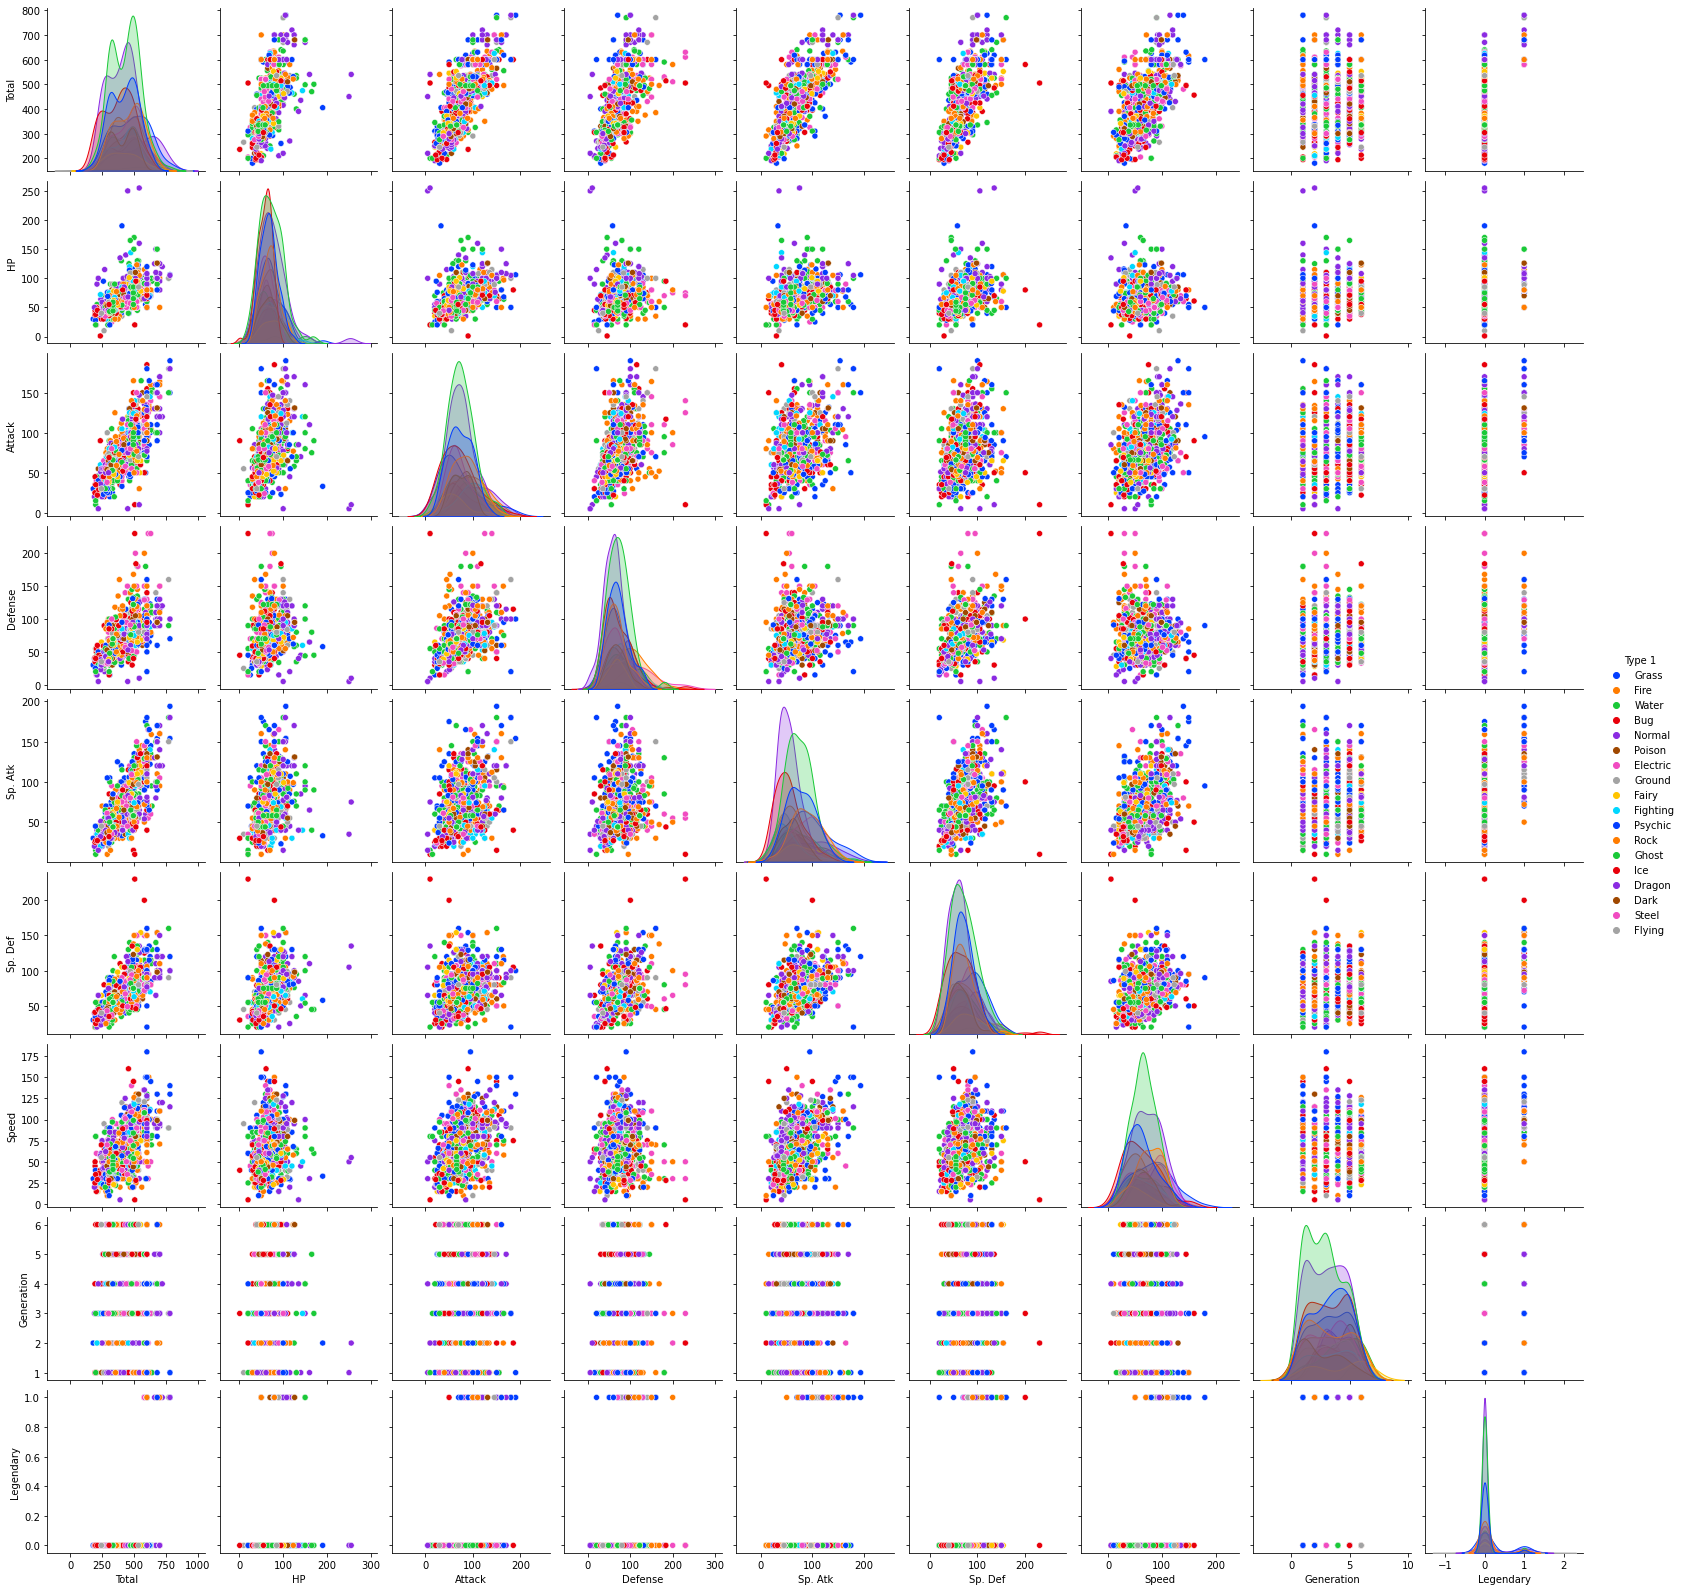

In [71]:
sns.pairplot(pokemon,hue="Type 1",palette="bright")

<AxesSubplot:xlabel='Generation', ylabel='Total'>

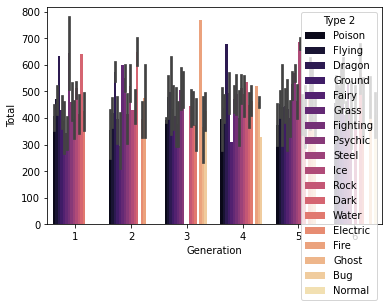

In [77]:
sns.barplot(x='Generation',y='Total',hue='Type 2',data=pokemon,palette='magma')
